In [1]:
import numpy
import pandas
pd = pandas

In [2]:
passing_data = pandas.read_csv("./2020_Problem_D_DATA/passingevents.csv")

In [3]:
passing_data.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0


# Centroid coordinates and dispersion

## long

In [4]:
passing_data

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
23424,38,Opponent14,Opponent14_M3,Opponent14_D1,2H,2758.973892,Simple pass,57,56,65.0,63.0
23425,38,Opponent14,Opponent14_D1,Opponent14_D6,2H,2760.286946,Simple pass,65,63,61.0,96.0
23426,38,Opponent14,Opponent14_D6,Opponent14_M4,2H,2763.698599,Simple pass,61,96,40.0,85.0
23427,38,Opponent14,Opponent14_M4,Opponent14_M2,2H,2783.137836,Simple pass,59,70,53.0,89.0


In [5]:
ppd = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'EventOrigin_x', 'EventOrigin_y']]
ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [6]:
X_mean, Y_mean = ppd[['EventOrigin_x', 'EventOrigin_y']].mean()

In [7]:
pomd = ppd.groupby('OriginPlayerID').mean()

In [8]:
pomd['distance'] = [((x - X_mean)**2 + (y - Y_mean)**2)**0.5 for x,y in zip(pomd['EventOrigin_x'],pomd['EventOrigin_y'])]

In [9]:
pomd

,EventOrigin_x,EventOrigin_y,distance
OriginPlayerID,,,
Huskies_D1,34.297297,54.083431,13.485088
Huskies_D10,37.184211,21.973684,29.489998
Huskies_D2,34.743103,45.163793,13.154692
Huskies_D3,35.467675,51.566713,11.742218
Huskies_D4,50.718805,12.525483,37.410368
Huskies_D5,48.324800,34.862400,14.947839
Huskies_D6,39.319876,75.639752,27.017638
Huskies_D7,51.115196,82.735294,33.225057
Huskies_D8,51.996198,86.798479,37.367211


In [73]:
pomd.std()[2]

10.178254872596563

In [78]:
centroid_coordinates_and_dispersion = pd.DataFrame({'Centroid coordinates':[(X_mean, Y_mean)], 'dispersion':pomd.std()[2]})

In [79]:
centroid_coordinates_and_dispersion.to_csv("centroid_coordinates_and_dispersion.csv")

# Clustering coefficient

## long

In [11]:
pure_passing_data = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'DestinationPlayerID']]
ppd = pure_passing_data

In [12]:
ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [13]:
ppd['count'] = 1
ppd = ppd.groupby(['OriginPlayerID', 'DestinationPlayerID']).sum()

In [14]:
ppd

count
OriginPlayerID DestinationPlayerID       
Huskies_D1     Huskies_D1               2
               Huskies_D10              2
               Huskies_D2              59
               Huskies_D3             105
               Huskies_D4              73
...                                   ...
Huskies_M9     Huskies_M13              5
               Huskies_M3               8
               Huskies_M4               6
               Huskies_M6              15
               Huskies_M8               2

[656 rows x 1 columns]

In [15]:
ppd = ppd.sort_values(by='count').ix[::-1]

In [16]:
ppd

,,count
OriginPlayerID,DestinationPlayerID,
Huskies_M1,Huskies_F2,182
Huskies_M3,Huskies_M1,168
Huskies_M1,Huskies_M3,143
Huskies_D3,Huskies_G1,120
Huskies_F2,Huskies_M1,117
...,...,...
Huskies_F5,Huskies_F5,1
Huskies_D3,Huskies_M10,1
Huskies_F5,Huskies_D6,1


In [17]:
d0 = ppd.copy()
d0 = pandas.DataFrame({'i': list(map(lambda x: x[0], d0.index)), 'j': list(map(lambda x: x[1], d0.index)), 'count':d0.to_numpy().T[0]})
d1 = d0.copy()
d2 = d0.copy()

In [18]:
d1 = d1.rename(columns={'i':'j', "j":'k'})
d2 = d2.rename(columns={'i':'k', "j":'i'})

In [19]:
d1

,j,k,count
0,Huskies_M1,Huskies_F2,182
1,Huskies_M3,Huskies_M1,168
2,Huskies_M1,Huskies_M3,143
3,Huskies_D3,Huskies_G1,120
4,Huskies_F2,Huskies_M1,117
...,...,...,...
651,Huskies_F5,Huskies_F5,1
652,Huskies_D3,Huskies_M10,1
653,Huskies_F5,Huskies_D6,1
654,Huskies_F5,Huskies_D3,1


In [20]:
merged_data = pd.merge(pd.merge(d0, d1, on='j'), d2, on=['k', 'i'])
md = merged_data
md

,i,j,count_x,k,count_y,count
0,Huskies_M1,Huskies_F2,182,Huskies_M1,117,7
1,Huskies_M1,Huskies_M1,7,Huskies_M1,7,7
2,Huskies_M1,Huskies_M3,143,Huskies_M1,168,7
3,Huskies_M1,Huskies_G1,20,Huskies_M1,24,7
4,Huskies_M1,Huskies_D3,60,Huskies_M1,47,7
...,...,...,...,...,...,...
12553,Huskies_M10,Huskies_D7,9,Huskies_M1,49,8
12554,Huskies_M10,Huskies_D6,1,Huskies_M1,32,8
12555,Huskies_M10,Huskies_F4,3,Huskies_M1,15,8
12556,Huskies_M10,Huskies_M9,1,Huskies_M1,11,8


In [21]:
md = md.rename(columns={'count_x':'wij', 'count_y':'wjk', 'count':'wki'})

In [22]:
md

,i,j,wij,k,wjk,wki
0,Huskies_M1,Huskies_F2,182,Huskies_M1,117,7
1,Huskies_M1,Huskies_M1,7,Huskies_M1,7,7
2,Huskies_M1,Huskies_M3,143,Huskies_M1,168,7
3,Huskies_M1,Huskies_G1,20,Huskies_M1,24,7
4,Huskies_M1,Huskies_D3,60,Huskies_M1,47,7
...,...,...,...,...,...,...
12553,Huskies_M10,Huskies_D7,9,Huskies_M1,49,8
12554,Huskies_M10,Huskies_D6,1,Huskies_M1,32,8
12555,Huskies_M10,Huskies_F4,3,Huskies_M1,15,8
12556,Huskies_M10,Huskies_M9,1,Huskies_M1,11,8


In [23]:
md['www'] = [(wij * wjk * wki) for wij, wjk, wki in zip(md['wij'], md['wjk'], md['wki'])]
md['ww'] = [(wij * wki) for wij, wki in zip(md['wij'], md['wki'])]

In [24]:
md = md.groupby('i').sum()

In [25]:
md['Clustering coefficient'] = [www/ww for www,ww in zip(md['www'], md['ww'])]
md = md.sort_values(by='Clustering coefficient').ix[::-1]
md

,wij,wjk,wki,www,ww,Clustering coefficient
i,,,,,,
Huskies_D10,296,2661,261,49529,1130,43.830973
Huskies_M7,153,2363,161,16680,395,42.227848
Huskies_M2,1156,6631,1117,201397,5009,40.207027
Huskies_D2,13594,9749,11609,10344601,258486,40.019966
Huskies_D9,549,4138,472,87852,2197,39.987255
Huskies_F3,966,7333,1102,155451,3937,39.484633
Huskies_D5,15519,9727,14191,13362385,344961,38.735930
Huskies_M3,21295,8753,17700,22852413,603285,37.879962
Huskies_D4,12872,8858,13382,12399560,328335,37.764966


In [81]:
md.to_csv('Clustering coefficient.csv')

# Largest eigenvalue of the adjacency matrix

## long

In [26]:
# pure_passing_data = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'DestinationPlayerID']]
# ppd = pure_passing_data
# ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [27]:
ppd = d0.copy() # 使用上一章的d0数据

In [28]:
players = list(set(ppd['i']))
players = sorted(players)
players

['Huskies_D1',
 'Huskies_D10',
 'Huskies_D2',
 'Huskies_D3',
 'Huskies_D4',
 'Huskies_D5',
 'Huskies_D6',
 'Huskies_D7',
 'Huskies_D8',
 'Huskies_D9',
 'Huskies_F1',
 'Huskies_F2',
 'Huskies_F3',
 'Huskies_F4',
 'Huskies_F5',
 'Huskies_F6',
 'Huskies_G1',
 'Huskies_M1',
 'Huskies_M10',
 'Huskies_M11',
 'Huskies_M12',
 'Huskies_M13',
 'Huskies_M2',
 'Huskies_M3',
 'Huskies_M4',
 'Huskies_M5',
 'Huskies_M6',
 'Huskies_M7',
 'Huskies_M8',
 'Huskies_M9']

In [29]:
import numpy as np

In [30]:
mat = np.zeros((30, 30))

In [31]:
for i, iplayer in enumerate(players):
    for j, jplayer in enumerate(players):
        qr = ppd[ppd['i']==iplayer][ppd['j']==jplayer].to_numpy()
        if len(qr) > 0:
            mat[i][j] = qr[-1][-1]
        else:
            mat[i][j] = 0

In [32]:
A = mat
A

array([[  2.,   2.,  59., 105.,  73.,  57.,  25.,  34.,  23.,   6.,  23.,
         49.,   5.,  19.,  19.,  18., 107.,  92.,   2.,   2.,  13.,   2.,
          3.,  51.,  26.,   0.,  21.,   4.,   3.,   6.],
       [  1.,   0.,   0.,  10.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   6.,   3.,   0.,   0.,   0.,   0.,
          0.,   5.,   2.,   0.,   0.,   0.,   0.,   0.],
       [ 62.,   0.,   2.,  49.,  39.,  47.,  52.,  26.,   2.,   8.,  13.,
         56.,   1.,   8.,   4.,   8.,  62.,  46.,   1.,   4.,   2.,   1.,
          0.,  44.,  22.,   1.,  12.,   2.,   1.,   5.],
       [ 98.,   9.,  35.,   5.,  59.,  14.,   6.,  18.,  42.,   0.,  21.,
         50.,   1.,   8.,  14.,  21., 120.,  47.,   1.,   4.,   9.,   3.,
          5.,  54.,  30.,   4.,  23.,   3.,  14.,   9.],
       [ 57.,   3.,  30.,  35.,   2.,   1.,   0.,   1.,   2.,   0.,  25.,
         66.,  10.,  25.,  33.,  20.,  25.,  62.,   0.,   3.,  19.,   0.,
          9.,  63.,  33.,   8., 

In [33]:
eigenvalue, eigenvector = np.linalg.eig(mat)

In [34]:
eigenvalue

array([ 5.95254653e+02 +0.j        , -1.86999034e+02 +0.j        ,
        1.05906653e+02 +0.j        , -1.12900652e+02+13.69967343j,
       -1.12900652e+02-13.69967343j, -9.00959385e+01 +0.j        ,
        6.02350322e+01 +0.j        ,  5.15647520e+01 +0.j        ,
       -6.99739297e+01 +0.j        , -6.49331339e+01 +0.j        ,
       -5.48768592e+01 +0.j        , -4.34216314e+01 +0.j        ,
       -3.16623654e+01 +0.j        ,  2.25055603e+01 +4.49255587j,
        2.25055603e+01 -4.49255587j, -2.45370669e+01 +0.j        ,
       -1.28519891e+01 +0.j        ,  6.49104965e+00 +3.92283684j,
        6.49104965e+00 -3.92283684j, -6.98968854e+00 +0.j        ,
       -5.82378451e+00 +0.j        ,  5.26283713e+00 +0.j        ,
       -1.87297116e+00 +1.64005044j, -1.87297116e+00 -1.64005044j,
        2.52443344e+00 +0.64476894j,  2.52443344e+00 -0.64476894j,
       -1.78102180e+00 +0.j        , -1.26170947e-01 +0.18622625j,
       -1.26170947e-01 -0.18622625j,  4.80016495e-01 +0.j     

In [35]:
lec = max(eigenvalue)
lec

(595.2546530823837+0j)

In [36]:
eigenvector

,
       [-2.35513875e-02+0.00000000e+00j,  5.87830983e-03+0.00000000e+00j,
         4.33088879e-02+0.00000000e+00j,  1.02189437e-02-7.10935658e-03j,
         1.02189437e-02+7.10935658e-03j, -1.46696018e-02+0.00000000e+00j,
        -4.09827540e-02+0.00000000e+00j, -9.55832450e-03+0.00000000e+00j,
         6.00773029e-02+0.00000000e+00j,  4.28615925e-02+0.00000000e+00j,
         5.81280233e-02+0.00000000e+00j,  9.66934695e-04+0.00000000e+00j,
        -8.23868194e-02+0.00000000e+00j, -8.00302011e-02-2.25897754e-02j,
        -8.00302011e-02+2.25897754e-02j,  4.44089614e-02+0.00000000e+00j,
        -1.83829043e-01+0.00000000e+00j, -1.21914182e-01+1.16588221e-02j,
        -1.21914182e-01-1.16588221e-02j, -3.44257582e-01+0.00000000e+00j,
         1.31268469e-01+0.00000000e+00j, -6.18527597e-02+0.00000000e+00j,
         4.56944941e-01+0.00000000e+00j,  4.56944941e-01-0.00000000e+00j,
        -2.03775587e-01-8.96180935e-02j, -2.03775587e-01+8.96180935e-02j,
        -5.11504289e-01+0.00000000e+

In [84]:
pd.DataFrame({'Largest eigenvalue':[lec]}).to_csv('Largest eigenvalue.csv')

# Algebraic connectivity

## long

In [37]:
S = np.zeros((30, 30))

In [38]:
for i, line in enumerate(A):
    S[i][i] = sum(line)

In [39]:
S

array([[ 851.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,   38.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,    0.,  580.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,    0.,    0.,  727.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,    0.,    0.,

In [40]:
L = S - A

In [41]:
L

array([[ 8.490e+02, -2.000e+00, -5.900e+01, -1.050e+02, -7.300e+01,
        -5.700e+01, -2.500e+01, -3.400e+01, -2.300e+01, -6.000e+00,
        -2.300e+01, -4.900e+01, -5.000e+00, -1.900e+01, -1.900e+01,
        -1.800e+01, -1.070e+02, -9.200e+01, -2.000e+00, -2.000e+00,
        -1.300e+01, -2.000e+00, -3.000e+00, -5.100e+01, -2.600e+01,
         0.000e+00, -2.100e+01, -4.000e+00, -3.000e+00, -6.000e+00],
       [-1.000e+00,  3.800e+01,  0.000e+00, -1.000e+01, -8.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -1.000e+00,
        -2.000e+00, -6.000e+00, -3.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00, -5.000e+00, -2.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-6.200e+01,  0.000e+00,  5.780e+02, -4.900e+01, -3.900e+01,
        -4.700e+01, -5.200e+01, -2.600e+01, -2.000e+00, -8.000e+00,
        -1.300e+01, -5.600e+01, -1.000e+00, -8

In [85]:
eigenvalueL, eigenvectorL = np.linalg.eig(L)

In [87]:
sorted(eigenvalueL)[1]

22.35827568140775

In [88]:
pd.DataFrame({'Algebraic connectivity':[sorted(eigenvalueL)[1]]}).to_csv('Algebraic connectivity')

# Eigenvector centrality

## long

In [42]:
# 不确定
eigenvector[list(eigenvalue).index(lec)]

array([-0.33010464+0.j        , -0.31268098+0.j        ,
       -0.43077116+0.j        , -0.47352017+0.j        ,
       -0.47352017-0.j        ,  0.08493998+0.j        ,
       -0.02137547+0.j        , -0.08662863+0.j        ,
       -0.00382151+0.j        , -0.03633349+0.j        ,
        0.01991632+0.j        , -0.01547523+0.j        ,
       -0.00490323+0.j        ,  0.02945663+0.02786254j,
        0.02945663-0.02786254j,  0.15013052+0.j        ,
        0.08543584+0.j        ,  0.0314515 -0.02737969j,
        0.0314515 +0.02737969j, -0.00223783+0.j        ,
       -0.00182912+0.j        ,  0.01179496+0.j        ,
        0.02187388-0.02626778j,  0.02187388+0.02626778j,
       -0.00181397+0.00263451j, -0.00181397-0.00263451j,
       -0.00086742+0.j        , -0.05481535+0.00292738j,
       -0.05481535-0.00292738j,  0.02942713+0.j        ])

In [43]:
import networkx as nx

In [44]:
G = nx.Graph()

In [45]:
for i, p in enumerate(players):
    G.add_node(i)

In [46]:
for i in range(len(players)):
    for j in range(len(players)):
        G.add_edge(i, j, weight=A[i][j])

In [89]:
ec = nx.eigenvector_centrality_numpy(G, weight='weight')
ec

{0: 0.2894454092689096,
 1: 0.013022076702967093,
 2: 0.20433795812148844,
 3: 0.23514707481735722,
 4: 0.24659462421217038,
 5: 0.24116325821567197,
 6: 0.1290263410016456,
 7: 0.16113371486038724,
 8: 0.11843981694665617,
 9: 0.01927031616941641,
 10: 0.12598847135454483,
 11: 0.38205619397525126,
 12: 0.029056229502344162,
 13: 0.0699613672079168,
 14: 0.061861919176655206,
 15: 0.08750822336684863,
 16: 0.1506860874832384,
 17: 0.47433987368668845,
 18: 0.013998726397280017,
 19: 0.02056736818956699,
 20: 0.06424203789993319,
 21: 0.024648841636297006,
 22: 0.026074355853304577,
 23: 0.36246544389546614,
 24: 0.19322629765676097,
 25: 0.014684819013918271,
 26: 0.19010577083963348,
 27: 0.010264625171988673,
 28: 0.053818049537297505,
 29: 0.04633641382400998}

In [93]:
ps = []
vs = []
for p, v in ec.items():
    ps.append(players[0])
    vs.append(v)

In [94]:
pd.DataFrame({'player':ps, 'Eigenvector centrality':vs}).to_csv('Eigenvector centrality.csv')

# triadic configurations

## long

In [48]:
from itertools import combinations, permutations

In [49]:
triples = combinations(players, 3)

In [50]:
triples = list(triples)
triples

', 'Huskies_D8', 'Huskies_M11'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M12'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M13'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M2'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M3'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M4'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M5'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M6'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M7'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M8'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M9'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F2'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F3'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F4'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F5'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F6'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_G1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M10'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M11'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M12

In [51]:
all_edges = [(x, y) for x,y in zip(ppd.i, ppd.j)]

In [52]:
triangles = []

for a, b, c in triples:
    if ((a,b) in all_edges or (b,a) in all_edges) and ((a,c) in all_edges or (c,a) in all_edges) and ((b,c) in all_edges or (c,b) in all_edges):
        triangles.append((a,b,c))

In [53]:
len(triangles)

2263

# triadic configurations value

## long

In [54]:
values = [0] * len(triangles)

In [55]:
for i, t in enumerate(triangles):
    edges = list(permutations(t, 2))
    for e in edges:
        qr = ppd[ppd.i == e[0]][ppd.j == e[1]].to_numpy()
        if len(qr) > 0:
            values[i] += qr[-1][-1]

In [56]:
tvd = pd.DataFrame({'triangle':triangles, 'value':values})

In [57]:
tvd = tvd.sort_values(by='value').ix[::-1]
tvd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",731
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",634
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",613
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",603
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",601
...,...,...
2203,"(Huskies_M10, Huskies_M11, Huskies_M9)",6
883,"(Huskies_D4, Huskies_D6, Huskies_D8)",6
584,"(Huskies_D2, Huskies_M10, Huskies_M8)",5
892,"(Huskies_D4, Huskies_D6, Huskies_M10)",4


In [58]:
max_value = max(tvd.value)

In [97]:
pd.DataFrame({'amount':[len(triangles)], 'max value':[max_value]}).to_csv('triadic configurations.csv')

# team formationteam formation

In [59]:
threshold = max_value / 2

In [60]:
triangles_filtered = tvd[tvd['value'] >= threshold]
tfd = triangles_filtered

In [61]:
tfd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",731
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",634
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",613
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",603
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",601
193,"(Huskies_D1, Huskies_F2, Huskies_M1)",580
956,"(Huskies_D4, Huskies_F2, Huskies_M1)",570
46,"(Huskies_D1, Huskies_D3, Huskies_G1)",555
1877,"(Huskies_F2, Huskies_M1, Huskies_M4)",542
1879,"(Huskies_F2, Huskies_M1, Huskies_M6)",540


In [62]:
# def count_shared_edge(t0, t1):
#     num_shared_node = len(set(t0) & set(t1))
#     if num_shared_node <= 1:
#         return 0
#     elif num_shared_node == 2:

def count_shared_node(t0, t1):
    return len(set(t0) & set(t1)) 

In [63]:
tf = list(tfd.triangle.to_numpy())

In [64]:
pairs = combinations(tf, 2)
pairs = list(pairs)
len(pairs)

1225

In [65]:
weight = [count_shared_node(t0, t1) for t0, t1 in pairs]

In [66]:
a = [p[0] for p in pairs]
b = [p[1] for p in pairs]

In [67]:
new_graph = pd.DataFrame({'i':a, 'j':b, 'weight':weight})

In [68]:
new_graph = new_graph[new_graph['weight'] > 0]

In [69]:
new_graph

,i,j,weight
0,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D5, Huskies_F2, Huskies_M1)",2
1,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D1, Huskies_M1, Huskies_M3)",2
2,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D4, Huskies_M1, Huskies_M3)",2
3,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D5, Huskies_M1, Huskies_M3)",2
4,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D1, Huskies_F2, Huskies_M1)",2
...,...,...,...
1220,"(Huskies_D1, Huskies_M1, Huskies_M4)","(Huskies_F2, Huskies_G1, Huskies_M1)",1
1221,"(Huskies_D1, Huskies_M1, Huskies_M4)","(Huskies_F2, Huskies_F4, Huskies_M1)",1
1222,"(Huskies_M1, Huskies_M3, Huskies_M8)","(Huskies_F2, Huskies_G1, Huskies_M1)",1
1223,"(Huskies_M1, Huskies_M3, Huskies_M8)","(Huskies_F2, Huskies_F4, Huskies_M1)",1


In [98]:
new_graph.to_csv('team formation.csv')

In [99]:
newG = nx.Graph()

for n in a:
    newG.add_node(n)

for n in b:
    newG.add_node(n)

for i, w in enumerate(weight):
    newG.add_edge(a[i], b[i], weight=w)

In [100]:
import matplotlib.pyplot as plt

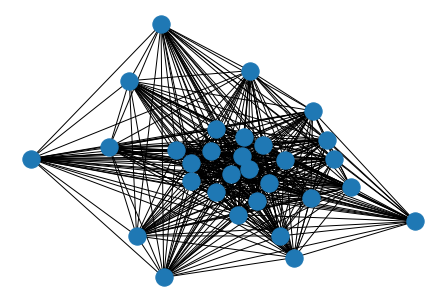

In [128]:
nx.draw_spring(G)

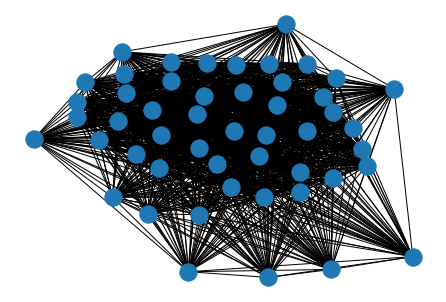

In [129]:
nx.draw_spring(newG)